# Fix Exploring Gradients with Gradient Clipping



```
jt -t onedork -fs 14 -altp -cellw 100% -lineh 125
# EFF0DB
# BECD
#C0CCC7
```

Train: nan, Test: nan
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


<IPython.core.display.Javascript object>


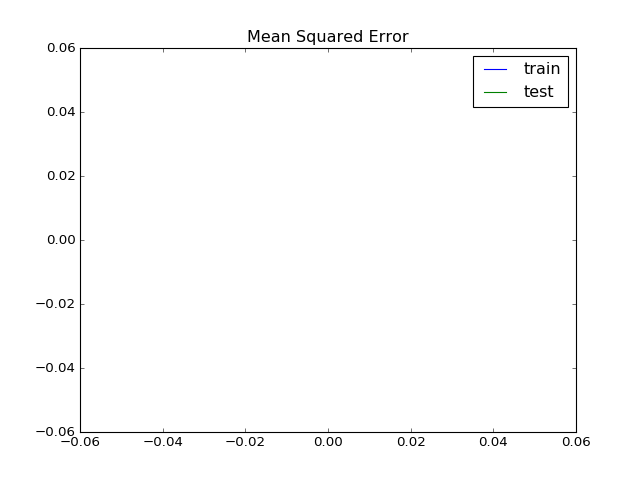

In [11]:
# Listing 8.11 Example of fitting and evaluating an MLP 
# with exploding gradients on the regression problem
%matplotlib notebook
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9))

# fit the model
history = model.fit(train_X, train_y, 
                    validation_data=(test_X, test_y), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_X, train_y, verbose=0)
test_mse = model.evaluate(test_X, test_y, verbose=0)
print("Train: %.4f, Test: %.4f" % (train_mse, test_mse))

# print loss during training
print(history.history['loss'])

# plot loss during training
fig, ax = plt.subplots(1,1, facecolor="black")
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.legend()
plt.show()

Running the example fits the model and calculates the mean squared error on the train and test sets. In this case, the model is unable to learn the problem, resulting in predictions of `NaN` values. The model weights exploded during training given the very large errors and in turn error gradients calculated for weight updates.

In [12]:
# print loss during training
print(history.history['loss'])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


## MLP with Gradient Norm Scaling

Train: 5.1586, Test: 19.6888


<IPython.core.display.Javascript object>


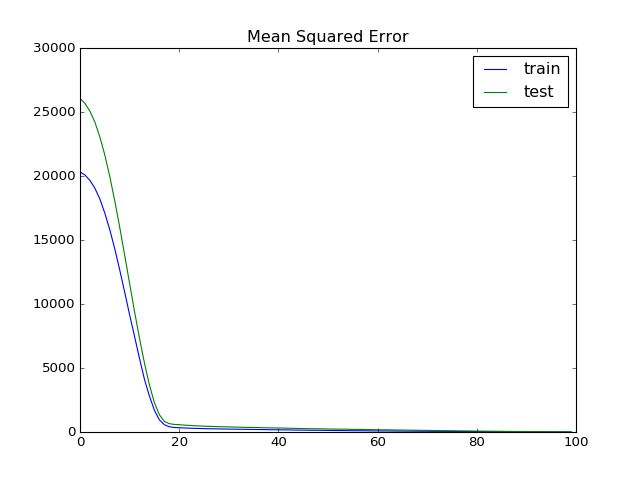

In [18]:
# Listing 8.11 Example of fitting and evaluating an MLP 
# with exploding gradients on the regression problem
%matplotlib notebook
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
# we use norm scaling here (clipnorm param)
model.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9, clipnorm=1.0))

# fit the model
history = model.fit(train_X, train_y, 
                    validation_data=(test_X, test_y), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_X, train_y, verbose=0)
test_mse = model.evaluate(test_X, test_y, verbose=0)
print("Train: %.4f, Test: %.4f" % (train_mse, test_mse))

# print loss during training
#print(history.history['loss'])

# plot loss during training
fig, ax = plt.subplots(1,1)
ax.set_title("Mean Squared Error")
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.legend()
plt.show()

## MLP with Gradient Value Clipping

Train: 9.5613, Test: 13.6532


<IPython.core.display.Javascript object>


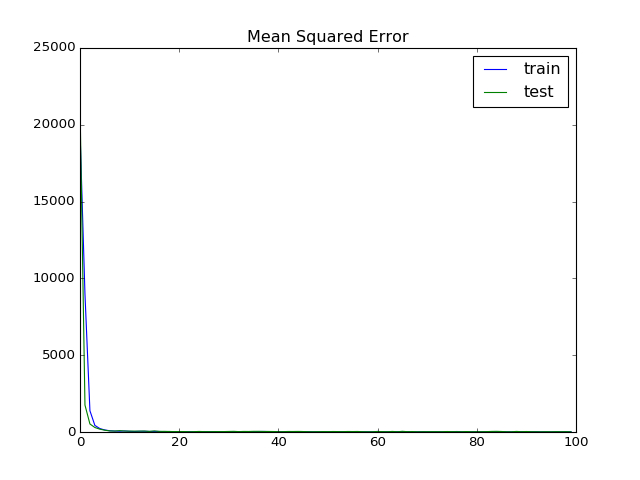

In [26]:
# Listing 8.11 Example of fitting and evaluating an MLP 
# with exploding gradients on the regression problem
%matplotlib notebook
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
# we use value clipping here (clipvalue param)
opt = SGD(lr=0.01, momentum=0.9, clipvalue=1.0)
model.compile(loss='mse', optimizer=opt)

# fit the model
history = model.fit(train_X, train_y, 
                    validation_data=(test_X, test_y), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_X, train_y, verbose=0)
test_mse = model.evaluate(test_X, test_y, verbose=0)
print("Train: %.4f, Test: %.4f" % (train_mse, test_mse))

# print loss during training
#print(history.history['loss'])

# plot loss during training
fig, ax = plt.subplots(1,1)
ax.set_title("Mean Squared Error")
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.legend()
plt.show()